In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

/home/kabir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
cat = cv2.imread("cat.png")

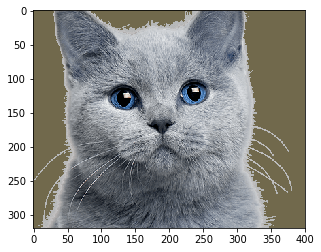

In [4]:
plt.imshow(cat)

In [5]:
cat.shape

(320, 400, 3)

In [6]:
model = Sequential()
model.add(Convolution2D(3, (3, 3),   
                        input_shape=cat.shape))

In [7]:
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
cat_batch = np.expand_dims(cat,axis=0)

In [8]:
conv_cat = model.predict(cat_batch)

In [9]:
# here we get rid of that added dimension and plot the image
def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print (conv_cat.shape)
    plt.imshow(conv_cat)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(318, 398, 3)


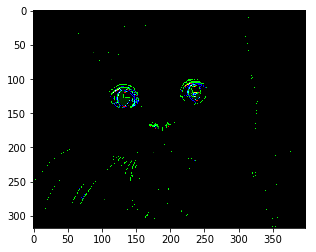

In [10]:
visualize_cat(model, cat)

/home/kabir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (10, 10), input_shape=(320, 400,...)`
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(311, 391, 3)


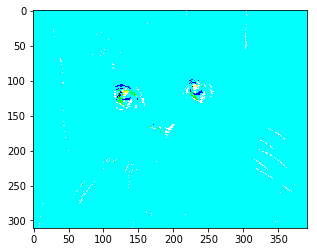

In [11]:

model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        10,    # y dimension of kernel (we're going for a 3x3 kernel)
                        10,    # x dimension of kernel
                        input_shape=cat.shape))


visualize_cat(model, cat)

In [13]:
def nice_cat_printer(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print(conv_cat2.shape)

    plt.imshow(conv_cat2)

In [14]:
nice_cat_printer(model, cat)

(311, 391, 3)


ValueError: cannot reshape array of size 364803 into shape (311,391)